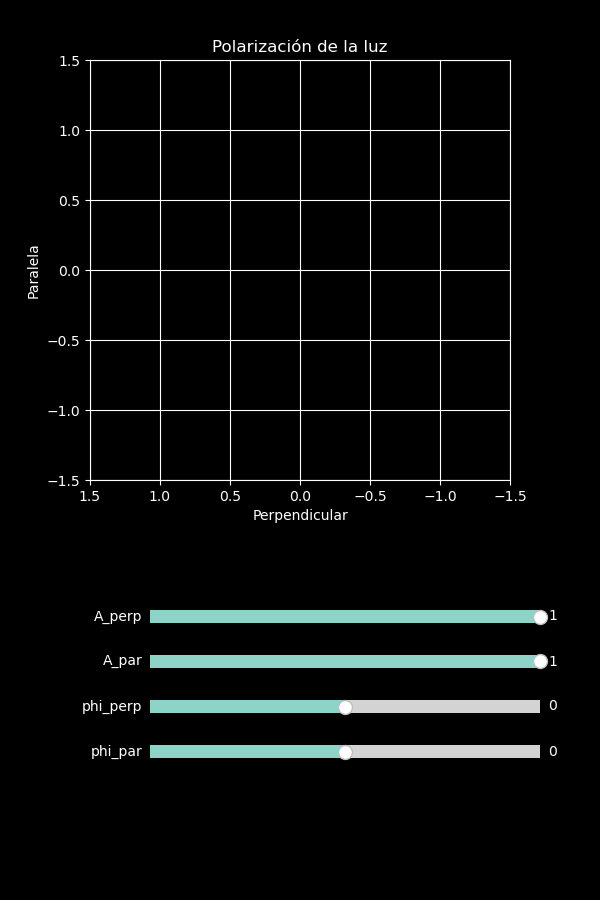

In [ ]:
import micropip
await micropip.install("matplotlib")
await micropip.install("scipy")
await micropip.install("ipywidgets")

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

# ---------------------------
# Inicialización de parámetros
# ---------------------------

A_perp_init = 1.0
A_par_init = 1.0
phi_perp_init = 0.0
phi_par_init = 0.0
omega = 2 * np.pi

# Tiempo
N_frames = 300
t = np.linspace(0, 2 * np.pi, N_frames)

# ---------------------------
# Campo eléctrico
# ---------------------------

def field_components(t, A_perp, A_par, phi_perp, phi_par):
    Ex = A_perp * np.cos(omega * t + phi_perp*np.pi)
    Ey = A_par * np.cos(omega * t + phi_par*np.pi)
    return Ex, Ey

# ---------------------------
# Gráfico principal
# ---------------------------

fig = plt.figure(figsize=(6, 9))
ax = fig.add_axes([0.15, 0.45, 0.7, 0.5])  # ocupa 1.5 veces más alto

trace, = ax.plot([], [], 'r-', lw=2)
arrow = ax.quiver(0, 0, 0, 0, angles='xy', scale_units='xy', scale=1, color='b')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.set_xlabel('Perpendicular')
ax.set_ylabel('Paralela')
ax.set_title('Polarización de la luz')
ax.grid(True)
ax.invert_xaxis()

# ---------------------------
# Sliders
# ---------------------------

axcolor = 'lightgoldenrodyellow'
ax_Ap = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axcolor)
ax_Ar = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
ax_phi_p = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axcolor)
ax_phi_r = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

s_Ap = Slider(ax_Ap, 'A_perp', 0, 1, valinit=A_perp_init)
s_Ar = Slider(ax_Ar, 'A_par', 0, 1, valinit=A_par_init)
s_phi_p = Slider(ax_phi_p, 'phi_perp', -1, 1, valinit=phi_perp_init)
s_phi_r = Slider(ax_phi_r, 'phi_par', -1, 1, valinit=phi_par_init)

# ---------------------------
# Inicialización
# ---------------------------

def init():
    trace.set_data([], [])
    arrow.set_UVC(0, 0)
    return trace, arrow

# ---------------------------
# Animación
# ---------------------------

def animate(i):
    A_perp = s_Ap.val
    A_par = s_Ar.val
    phi_perp = s_phi_p.val
    phi_par = s_phi_r.val
    x, y = field_components(t, A_perp, A_par, phi_perp, phi_par)

    # Mostrar solo los últimos 100 puntos sin conectar extremos
    if i < 100:
        x_window = x[:i+1]
        y_window = y[:i+1]
    else:
        x_window = x[i-99:i+1]
        y_window = y[i-99:i+1]

    trace.set_data(x_window, y_window)
    arrow.set_UVC(x[i], y[i])
    return trace, arrow

ani = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=N_frames, interval=30, blit=True
)

plt.show()

